In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings ('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
# checking for null values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# There is no null present but some column has object datatypes which we need to check 
# We need to convert values of some column in binomial format as machine understand binary language 
# let's convert and replace values of certain columns with 0 & 1 

In [7]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
data_copy = data.copy()
data_copy.replace(clean_data, inplace=True)

In [8]:
data_copy

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [9]:
data_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


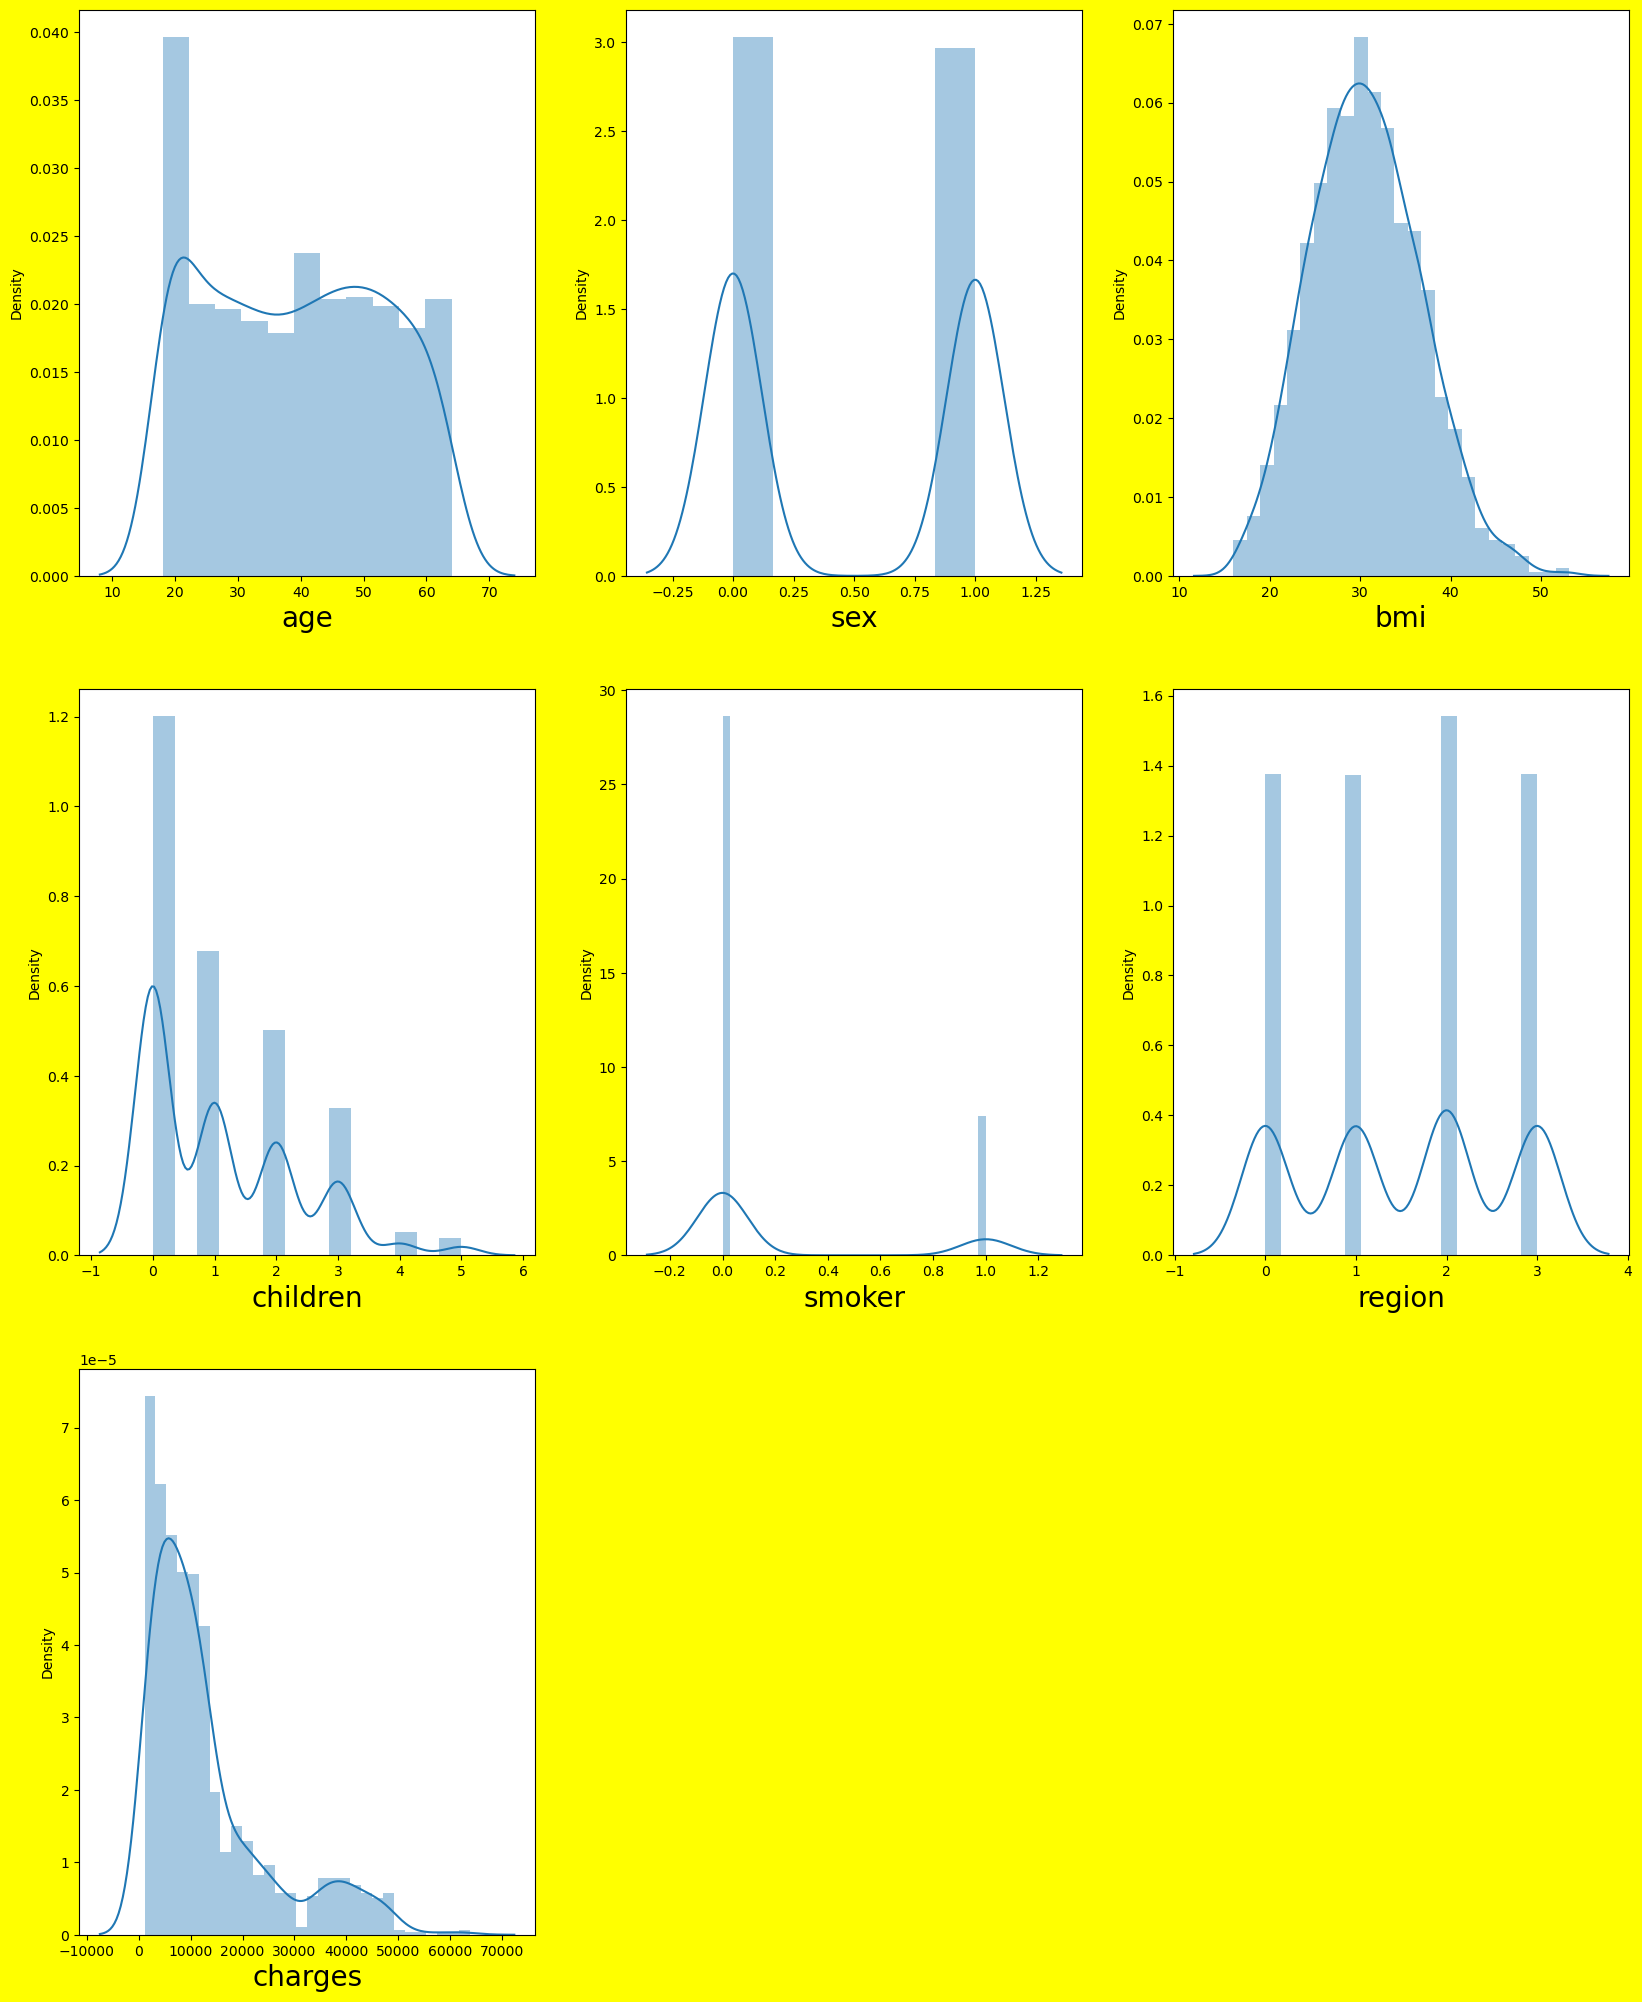

In [14]:
# as we can se that std deviation is very high in some columns so let's check the data distriution by using distribution plot 
plt.figure(figsize=(20,25),facecolor = 'yellow')
plotnumber = 1

for column in data_copy:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_copy[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()


In [15]:
# according to distribution plots continous data variables looks normally distributed 

In [16]:
# let's check the correlation between variables to rued out multicollinearity 
corr = data_copy.corr()
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.003243,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.007974,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.156686,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.001907,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.013246,0.787251
region,0.003243,-0.007974,0.156686,-0.001907,0.013246,1.000000,0.011741
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.011741,1.000000


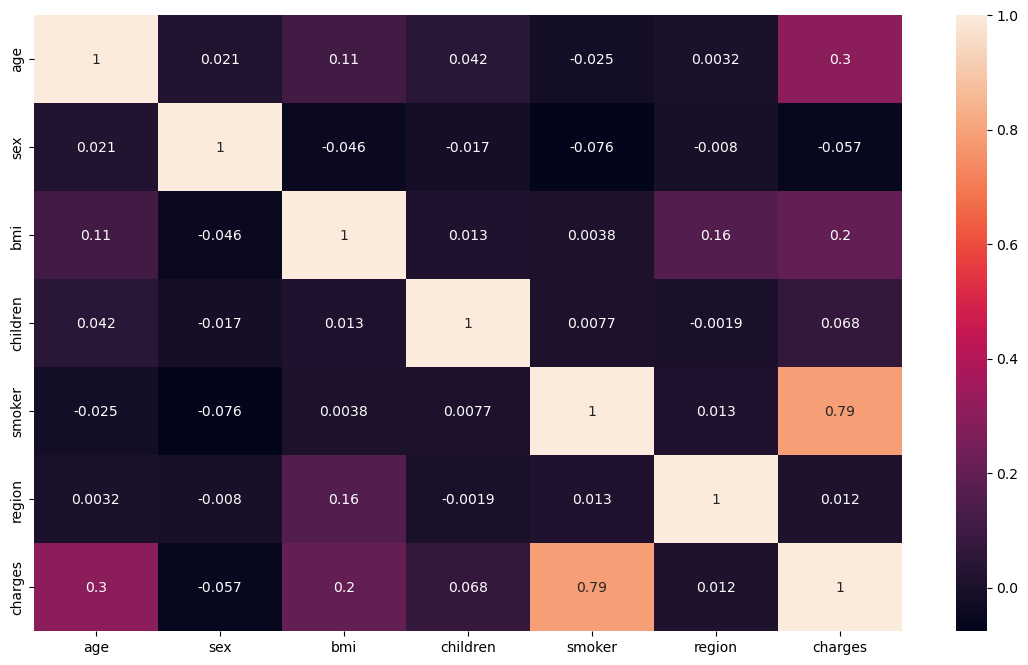

In [19]:
# let's plot this on graph
 # this code will get the coefficient of one variable vs all other variable(relationship)

plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True,annot_kws={'size':10})
plt.show()

In [20]:
# there is no multicollinearity between variables 

# as our Label is a continous data column we need to build a regression model for prediction
# First we need to import necessary libraries



In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [26]:
# We need to standarised tha data first before building model 
x = data_copy.drop(columns = ["charges"])
y = data_copy["charges"]

In [57]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [28]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [30]:

# let's split the data into train and test for model building 

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.25,random_state = 355)

In [31]:
# now all the preprocessing steps completed now we head towards the model building 


In [46]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [47]:
y_pred = lr.predict(x_test)

In [49]:
lr.score(x_train,y_train)

0.7607881926796474

In [52]:
lr.score(x_test,y_test)

0.7152045001869716

In [55]:
# lets check errors in model 
mean_absolute_error(y_test,y_pred)

4407.363934731827

In [56]:
mean_squared_error(y_test,y_pred)

39873355.86608197

In [62]:
# lets make insurance cost prediction with the help of model by giving variables in an array with the same order as dataset is in 
lr.predict(scaler.transform([[40,1,27.900,0,1,3]]))

array([30732.39011294])